# Offenive evolution of LeBron James in NBA
In this notebook we present an analysis of the evolution of LeBron James' offensive game, in terms of shot selection and efficiency, over the course of his NBA career. In particular, we analyze data from the regular seasons from 2003-2004 to 2019-2024, with the aim of understanding how his game has changed over the years and how this has influenced the offensive production of his teams.
To be more specific, we will focus on the following aspects:
- Shot selection: how has LeBron's shot selection evolved over the years? Has he become more efficient in terms of shot selection?
- Efficiency: how has LeBron's shooting efficiency evolved over the years? Has he become a more efficient scorer?
- Impact on team performance: how has LeBron's offensive evolution influenced the performance of his teams? Has he been able to improve the offensive production of his teams over the years?

## Shot selection
To analyze LeBron's shot selection over the years, we will look at the distribution of his shot attempts by shot location (restricted area, paint, mid-range, corner 3, ...). We will compare the distribution of shot attempts in different eras to see how LeBron's shot selection has evolved over time.
In order to do this, we will use a self arrenged version of EDU VADILLO kaggle dataset, which contains detailed information about LeBron's shot attempts, including shot location, shot type, and outcome. The dataset can be found here: https://www.kaggle.com/datasets/eduvadillo/lebron-james-career-shots
In this very first part of the analysis we will draw a heatmap of LeBron's shot attempts by shot location for different eras, in order to visualize how his shot selection has evolved over the years.

First, let's import the necessary libraries and load the dataset:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon

# Load the data
df = pd.read_pickle("LeBronShots.pickle")

### NBA Court Chart
Now we can begin our work. First, we need to define the NBA court chart, which will serve as the base for plotting the shot data. The following code defines a function that generates a basketball court chart using the matplotlib library. This function takes two inputs: the axis object on which the court will be plotted and the color of the court lines. It then returns the axis object for further customization.
This function is a modified version of the one provided by Zach Gilbert in his project "Visualizing NBA Shots with py-Goldsberry" which can be found here https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb.

In [10]:
#parameters
color = 'black'
lw = 2


def draw_court(ax=None):
        
    ax = plt.gca()

    #Elements of the court
    #Basketball hoop
    hoop = patches.Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    #Backboard
    backboard = patches.Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    #Paint
    paint_lines = patches.Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    
    #Free throw top arc
    free_throw = patches.Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    
    #Restricted area
    restricted_area = patches.Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)

    #Three point line

    #Side three point lines
    right_corner_side_line = patches.Rectangle((-220, -47.5), 0, 137.5, linewidth=lw, color=color)
    left_corner_side_line = patches.Rectangle((220, -47.5), 0, 137.5, linewidth=lw, color=color)

    #Three point arc
    three_arc = patches.Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    #Outer lines
    outer_lines = patches.Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)

    #List of court elements
    court_elements = [hoop, backboard, paint_lines, free_throw, restricted_area, right_corner_side_line, left_corner_side_line, three_arc, outer_lines]

    #Add the elements to the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


### Area Division Function
Once we have defined the court chart, we can implement a new function to generate the areas into which the court is divided. Specifically, we will divide the court into 10 areas:
- Restricted Area
- In The Paint (Non-RA)
- Mid-Range Left
- Mid-Range Right
- Mid-Range Center
- Left Corner 3
- Right Corner 3
- Three Point Left
- Three Point Right
- Three Point Center

This function utilizes Polygon objects from the shapely library to define specific areas. We start by constructing several polygons using the coordinates of the points that define the vertices of these areas. Then, we employ set operations on these polygons to create the desired areas.

The function returns a dictionary that maps each area to its corresponding polygon object.

In [28]:
# Creare l'arco da tre punti
theta = np.linspace(np.radians(22), np.radians(158), 100)
arc_x = 237.5 * np.cos(theta)
arc_y = 237.5 * np.sin(theta)


# Creare la restricted area
theta = np.linspace(np.radians(0), np.radians(180), 100)
restricted_x = 40 * np.cos(theta)
restricted_y = 40 * np.sin(theta)

# DEFINIZIONE DEI PUNTI DELLE DIVERSE AREE DI TIRO
# Arco da tre punti
Arc_points = np.column_stack((arc_x, arc_y))

# Tiro da tre punti
ThreePointArea_Left_points = [(250, 422.5), (250, 90), (220, 90), (80, 142.5), (120, 422.5)]

ThreePointArea_Center_points = [(80, 142.5), (120, 422.5), (-120, 422.5), (-80, 142.5)]

ThreePointArea_Right_points = [(-250, 422.5), (-250, 90), (-220, 90), (-80, 142.5), (-120, 422.5)]

# Tiro da tre punti (angoli)
LeftCornerThree_points = [(220, -47.5), (220, 90), (250, 90), (250, -47.5)]

RightCornerThree_points = [(-220, -47.5), (-220, 90), (-250, 90), (-250, -47.5)]


# Mid Range
MidRange_Left_points_Aux = [(120, 422.5), (80, 142.5), (80, -47.5), (220, -47.5), (220, 422.5)]
MidRange_Center_points = [(-80, 142.5), (-120, 422.5), (120, 422.5), (80, 142.5)]
MidRange_Right_points_Aux = [(-120, 422.5), (-80, 142.5), (-80, -47.5), (-220, -47.5), (-220, 422.5)]

# Pitturato
Paint_points = [(80, -47.5), (80, 142.5), (-80, 142.5), (-80, -47.5)]

# Restricted Area
#Aggiungo i punti per un rettangolo tra la restricheted area e il tabellone
Restricted_Area_points1 = np.column_stack((restricted_x, restricted_y))
Restriced_Area_points2 = [(40, 0), (40, -10), (-40, -10), (-40, 0)]
Restricted_Area_points = np.vstack((Restricted_Area_points1, Restriced_Area_points2))


# CREAZIONE DEGLI OGGETTI POLYGON
def create_polygons():

# Arco da tre punti
# Oggetto ausiliario per costruire i diversi poligoni da plottare
    Arc_Pol = Polygon(Arc_points)

    # Tiro da tre punti
    ThreePointArea_Left_Aux = Polygon(ThreePointArea_Left_points)
    ThreePointArea_Center_Aux = Polygon(ThreePointArea_Center_points)
    ThreePointArea_Right_Aux = Polygon(ThreePointArea_Right_points)
    LeftCornerThree = Polygon(LeftCornerThree_points)
    RightCornerThree = Polygon(RightCornerThree_points)

    # Mid Range
    MidRange_Left_Aux = Polygon(MidRange_Left_points_Aux)
    MidRange_Center_Aux = Polygon(MidRange_Center_points)
    MidRange_Right_Aux = Polygon(MidRange_Right_points_Aux)

    # Pitturato
    Paint = Polygon(Paint_points)

    # Restricted Area
    Restricted_Area = Polygon(Restricted_Area_points)


    # CALCOLO DELLA DIFFERENZA TRA I POLYGON

    # Tiro da tre punti
    ThreePointArea_Left = ThreePointArea_Left_Aux.difference(Arc_Pol)
    ThreePointArea_Center = ThreePointArea_Center_Aux.difference(Arc_Pol)
    ThreePointArea_Right = ThreePointArea_Right_Aux.difference(Arc_Pol)

    # Mid Range
    MidRange_Center_Aux1 = MidRange_Center_Aux.difference(ThreePointArea_Center)
    MidRange_Center = MidRange_Center_Aux1.difference(Paint)
    MidRange_Left = MidRange_Left_Aux.difference(ThreePointArea_Left)
    MidRange_Right = MidRange_Right_Aux.difference(ThreePointArea_Right)

    #Create a dictionary with the areas
    areas = {'Left Side Mid-Range': MidRange_Left, 'Right Side Mid-Range': MidRange_Right, 'Center Mid-Range': MidRange_Center, 'Left Side Corner 3': LeftCornerThree, 'Left Side Three Point': ThreePointArea_Left, 'Right Side Corner 3': RightCornerThree, 'Right Side Three Point': ThreePointArea_Right, 'Center Three Point': ThreePointArea_Center, 'In The Paint (Non Restricted)': Paint, 'Restricted Area': Restricted_Area}
    return areas

### Shot Distribution Function

Before we plot the shot distribution, there's one final step: calculating the opacity for each area of the court. This can be achieved using two functions:
##### Calculate Shot Distribution
This function determines the shot distribution percentage for a given dataset. It takes the dataset as input and returns a dictionary that maps each area to the number of shots attempted in that area.

In [22]:
# Shot distribution function
#Calculate Shot Distribution: This function determines the shot distribution percentage for a given dataset. It takes the dataset as input and returns a dictionary that maps each area to the number of shots attempted in that area.

#input data: DataFrame, list of strings
#output: dictionary
def shot_distribution(data, seasons):

    #Filter the data by the given seasons
    data = data[data.SEASON.isin(seasons)]

    #Get the total number of shots attempted for each area
    total = data.shape[0]

    #Get the percentage of shots attempted for each area
    #Left Side Mid-Range
    LS_Mid = data[(data.Area == 'Left Side(L)') & (data.Zone == 'Mid-Range')].shape[0] / total * 100

    #Right Side Mid-Range
    RS_Mid = data[(data.Area == 'Right Side(R)') & (data.Zone == 'Mid-Range')].shape[0] / total * 100

    #Center Mid-Range
    C_Mid = data[(data.Area == 'Center(C)') & (data.Zone == 'Mid-Range')].shape[0] / total * 100

    #Left Side Corner 3
    LS_Corner = data[(data.Zone == 'Left Corner 3')].shape[0] / total * 100

    #Left Side Three Point
    LS_Three = data[(data.Area == 'Left Side(L)') & (data.Zone == 'Above the Break 3')].shape[0] / total * 100

    #Right Side Corner 3
    RS_Corner = data[(data.Zone == 'Right Corner 3')].shape[0] / total * 100

    #Right Side Three Point
    RS_Three = data[(data.Area == 'Right Side(R)') & (data.Zone == 'Above the Break 3')].shape[0] / total * 100

    #Center Three Point
    C_Three = data[(data.Area == 'Center(C)') & (data.Zone == 'Above the Break 3')].shape[0] / total * 100

    #In The Paint (Non Restricted)
    Paint = data[(data.Zone == 'In The Paint (Non-RA)')].shape[0] / total * 100

    #Restricted Area
    Restricted = data[(data.Zone == 'Restricted Area')].shape[0] / total * 100

    #Create the dictionary
    distribution = {'Left Side Mid-Range': LS_Mid, 'Right Side Mid-Range': RS_Mid, 'Center Mid-Range': C_Mid, 'Left Side Corner 3': LS_Corner, 'Left Side Three Point': LS_Three, 'Right Side Corner 3': RS_Corner, 'Right Side Three Point': RS_Three, 'Center Three Point': C_Three, 'In The Paint (Non Restricted)': Paint, 'Restricted Area': Restricted}

    return distribution

##### Calculate Opacity
This function computes the opacity for each area based on the shot distribution. It takes the shot distribution dictionary and the maximum opacity value as inputs and returns a dictionary that maps each area to its corresponding opacity value.


In [25]:
#initialize the variables
distribution = {}
opacities = {'Left Side Mid-Range': 0, 'Right Side Mid-Range': 0, 'Center Mid-Range': 0, 'Left Side Corner 3': 0, 'Left Side Three Point': 0,
              'Right Side Corner 3': 0, 'Right Side Three Point': 0, 'Center Three Point': 0, 'In The Paint (Non Restricted)': 0, 'Restricted Area': 0}

def calculate_opacity(disribution, alpha):

    #get the max value of the distribution
    max_value = max(distribution.values())

    #calculate the opacity
    for area in distribution:
        opacity = (distribution[area] * alpha) / max_value
        #update the dictionary
        opacities[area] = opacity

    return opacities


print(calculate_opacity(distribution, 0.9))

{'Left Side Mid-Range': 0.1766901027582477, 'Right Side Mid-Range': 0.12217414818820985, 'Center Mid-Range': 0.05208220659816117, 'Left Side Corner 3': 0.025310978907517576, 'Left Side Three Point': 0.24775554353704707, 'Right Side Corner 3': 0.02190373174689021, 'Right Side Three Point': 0.1187669010275825, 'Center Three Point': 0.13531638723634398, 'In The Paint (Non Restricted)': 0.20005408328826396, 'Restricted Area': 0.8999999999999999}


### Plot Shot Distribution
Now that we have all the necessary functions in place, we can proceed to plot the shot distribution heatmap. Let's try to plot the shot distribution for LeBron's first run in Cleveland (2003-2004 to 2009-2010).

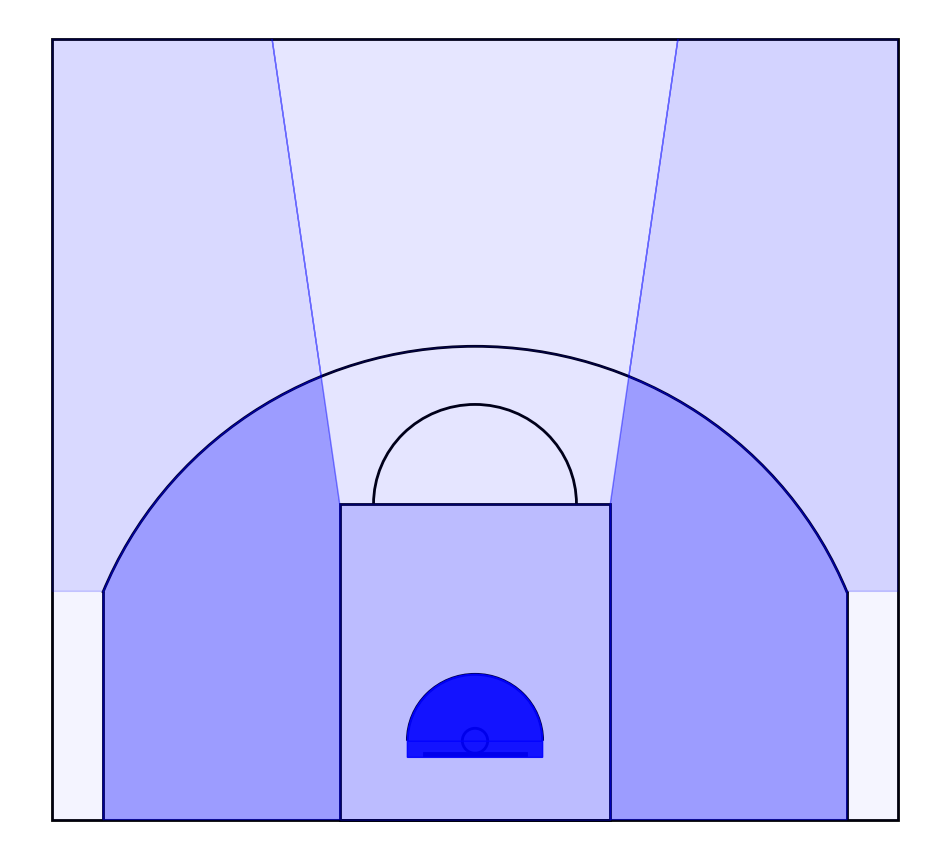

In [34]:
#define the values for the seasons
seasons = ['2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10']

#calculate the shot distribution for the given seasons
distribution = shot_distribution(df, seasons)

#calculate the opacities for the given distribution
opacities = calculate_opacity(distribution, 0.9)

#set the size of the plot
fig, ax = plt.subplots(figsize=(12, 11))

#plot the court
draw_court()

#plot the areas
areas = create_polygons()
for area in areas:
    plt.fill(*areas[area].exterior.xy, color='b', alpha=opacities[area])

plt.xlim(-275, 275)
plt.ylim(-70, 440)
plt.axis('off')
plt.show()

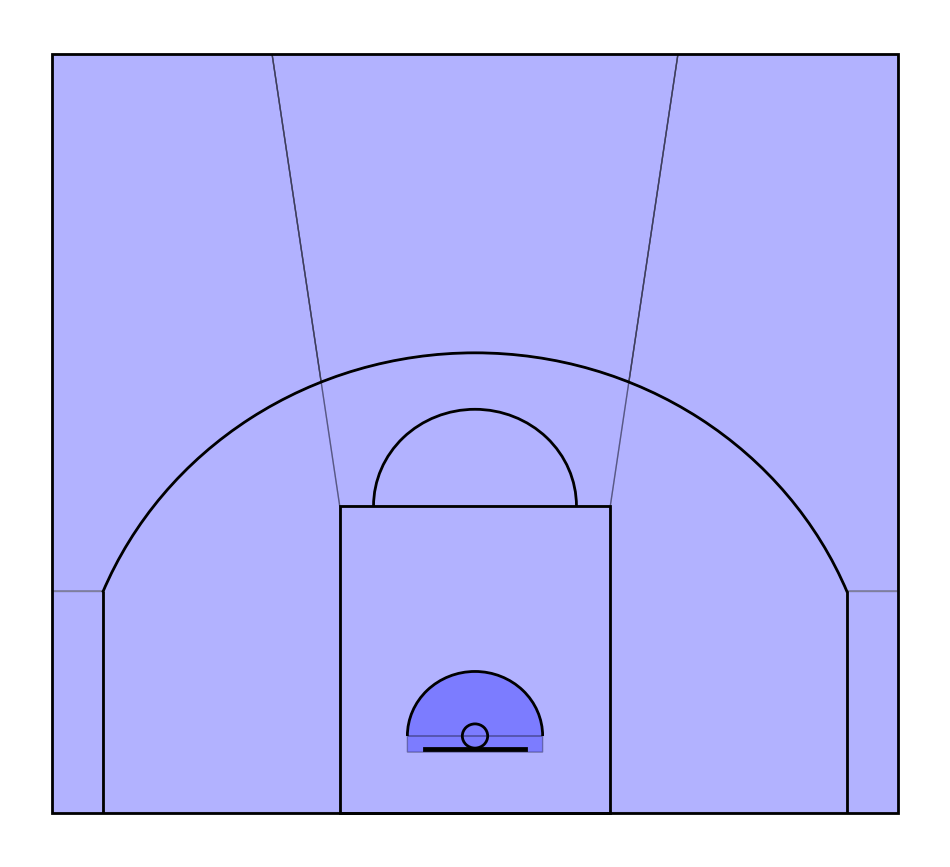

In [19]:
fig, ax = plt.subplots(figsize=(12, 11))

areas = create_polygons()
for area in areas:
    plt.fill(*area.exterior.xy, color='blue', alpha=0.3, zorder=0, edgecolor='black')

draw_court(ax=ax)

plt.xlim(-275, 275)
plt.ylim(-75, 450)
plt.axis('off')
plt.show()

In [13]:
# Read in the data
df = pd.read_pickle("LeBronShots.pickle")


Aggiunta dei tiri di Lebron nel periodo compreso tra la stagione 2003-04 e la stagione 2009-10 (inclusa)

In [14]:
Seasons = ['2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10']
# rappresento la percentuale di tiri presi in ogni zona del campo, divisi per Area e zona
# il campo è diviso in Left Side, Right Side, , Center, ognuna di queste è divisa in tMid-Range, In The Paint (Non Restricted), Restricted Area, Above the Break 3, Corner 3


# Prendo l'insieme zona e area dal dataset e calcolo la percentuale di tiri presi in ogni zona rispetto al totale

#calcolo il totale dei tiri presi in ogni zona
#Left Side Mid-Range
LS_Mid = df[(df.Area == 'Left Side(L)') & (df.Zone == 'Mid-Range') & (df.SEASON.isin(Seasons))].shape[0]


#Left Side Above the Break 3
LS_Above = df[(df.Area == 'Left Side(L)') & (df.Zone == 'Above the Break 3') & (df.SEASON.isin(Seasons))].shape[0]

#Left Side Corner 3
LS_Corner = df[(df.Zone == 'Left Corner 3') & (df.SEASON.isin(Seasons))].shape[0]



#Right Side Mid-Range
RS_Mid = df[(df.Area == 'Right Side(R)') & (df.Zone == 'Mid-Range') & (df.SEASON.isin(Seasons))].shape[0]

#Right Side Above the Break 3
RS_Above = df[(df.Area == 'Right Side(R)') & (df.Zone == 'Above the Break 3') & (df.SEASON.isin(Seasons))].shape[0]

#Right Side Corner 3
RS_Corner = df[(df.Zone == 'Right Corner 3') & (df.SEASON.isin(Seasons))].shape[0]


#Center Mid-Range
C_Mid = df[(df.Area == 'Center(C)') & (df.Zone == 'Mid-Range') & (df.SEASON.isin(Seasons))].shape[0]

#In The Paint (Non Restricted)
Paint = df[(df.Zone == 'In The Paint (Non-RA)') & (df.SEASON.isin(Seasons))].shape[0]

#Restricted Area
Restricted = df[(df.Zone == 'Restricted Area') & (df.SEASON.isin(Seasons))].shape[0]

#Center Above the Break 3
C_Above = df[(df.Area == 'Center(C)') & (df.Zone == 'Above the Break 3') & (df.SEASON.isin(Seasons))].shape[0]



total = df[df.SEASON.isin(Seasons)].shape[0]
lS_Mid_Perc = LS_Mid / total * 100
lS_Above_Perc = LS_Above / total * 100
lS_Corner_Perc = LS_Corner / total * 100

rS_Mid_Perc = RS_Mid / total * 100
rS_Above_Perc = RS_Above / total * 100
rS_Corner_Perc = RS_Corner / total * 100

c_Mid_Perc = C_Mid / total * 100
restricted_Perc = Restricted / total * 100
paint_Perc = Paint / total * 100
c_Above_Perc = C_Above / total * 100

print('Left Side Mid-Range:', lS_Mid_Perc)
print('Left Side Above the Break 3:', lS_Above_Perc)
print('Left Side Corner 3:', lS_Corner_Perc)

print('Right Side Mid-Range:', rS_Mid_Perc)
print('Right Side Above the Break 3:', rS_Above_Perc)
print('Right Side Corner 3:', rS_Corner_Perc)

print('Center Mid-Range:', c_Mid_Perc)
print('Restricted Area:', restricted_Perc)
print('In The Paint (Non Restricted):', paint_Perc)
print('Center Above the Break 3:', c_Above_Perc)

Left Side Mid-Range: 15.219244246614263
Left Side Above the Break 3: 6.790415759068094
Left Side Corner 3: 1.5910597594469174
Right Side Mid-Range: 15.219244246614263
Right Side Above the Break 3: 5.805474003220002
Right Side Corner 3: 1.6857656975092339
Center Mid-Range: 3.9492376171985986
Restricted Area: 35.34425608485652
In The Paint (Non Restricted): 10.256653092148877
Center Above the Break 3: 3.854531679136282


In [15]:
Seasons = ['2010-11', '2011-12', '2012-13', '2013-14']
# rappresento la percentuale di tiri presi in ogni zona del campo, divisi per Area e zona
# il campo è diviso in Left Side, Right Side, , Center, ognuna di queste è divisa in tMid-Range, In The Paint (Non Restricted), Restricted Area, Above the Break 3, Corner 3


# Prendo l'insieme zona e area dal dataset e calcolo la percentuale di tiri presi in ogni zona rispetto al totale


#calcolo il totale dei tiri presi in ogni zona
#Left Side Mid-Range
LS_Mid = df[(df.Area == 'Left Side(L)') & (df.Zone == 'Mid-Range') & (df.SEASON.isin(Seasons))].shape[0]


#Left Side Above the Break 3
LS_Above = df[(df.Area == 'Left Side(L)') & (df.Zone == 'Above the Break 3') & (df.SEASON.isin(Seasons))].shape[0]

#Left Side Corner 3
LS_Corner = df[(df.Zone == 'Left Corner 3') & (df.SEASON.isin(Seasons))].shape[0]


#Right Side Mid-Range
RS_Mid = df[(df.Area == 'Right Side(R)') & (df.Zone == 'Mid-Range') & (df.SEASON.isin(Seasons))].shape[0]



#Right Side Above the Break 3
RS_Above = df[(df.Area == 'Right Side(R)') & (df.Zone == 'Above the Break 3') & (df.SEASON.isin(Seasons))].shape[0]

#Right Side Corner 3
RS_Corner = df[(df.Zone == 'Right Corner 3') & (df.SEASON.isin(Seasons))].shape[0]


#Center Mid-Range
C_Mid = df[(df.Area == 'Center(C)') & (df.Zone == 'Mid-Range') & (df.SEASON.isin(Seasons))].shape[0]


#In The Paint (Non Restricted)

Paint = df[(df.Zone == 'In The Paint (Non-RA)') & (df.SEASON.isin(Seasons))].shape[0]

#Restricted Area
Restricted = df[(df.Zone == 'Restricted Area') & (df.SEASON.isin(Seasons))].shape[0]

#Center Above the Break 3
C_Above = df[(df.Area == 'Center(C)') & (df.Zone == 'Above the Break 3') & (df.SEASON.isin(Seasons))].shape[0]

total = df[df.SEASON.isin(Seasons)].shape[0]
lS_Mid_Perc = LS_Mid / total * 100
lS_Above_Perc = LS_Above / total * 100
lS_Corner_Perc = LS_Corner / total * 100

rS_Mid_Perc = RS_Mid / total * 100
rS_Above_Perc = RS_Above / total * 100
rS_Corner_Perc = RS_Corner / total * 100

c_Mid_Perc = C_Mid / total * 100
restricted_Perc = Restricted / total * 100
paint_Perc = Paint / total * 100
c_Above_Perc = C_Above / total * 100

print('Left Side Mid-Range:', lS_Mid_Perc)
print('Left Side Above the Break 3:', lS_Above_Perc)
print('Left Side Corner 3:', lS_Corner_Perc)

print('Right Side Mid-Range:', rS_Mid_Perc)
print('Right Side Above the Break 3:', rS_Above_Perc)
print('Right Side Corner 3:', rS_Corner_Perc)

print('Center Mid-Range:', c_Mid_Perc)
print('Restricted Area:', restricted_Perc)
print('In The Paint (Non Restricted):', paint_Perc)
print('Center Above the Break 3:', c_Above_Perc)

Left Side Mid-Range: 17.089201877934272
Left Side Above the Break 3: 6.685446009389671
Left Side Corner 3: 1.3708920187793427
Right Side Mid-Range: 10.854460093896714
Right Side Above the Break 3: 5.652582159624413
Right Side Corner 3: 1.6901408450704223
Center Mid-Range: 3.830985915492958
Restricted Area: 36.82629107981221
In The Paint (Non Restricted): 12.281690140845072
Center Above the Break 3: 3.511737089201878
